In [5]:
import pandas as pd
import numpy as np
import cv2 as cv

In [6]:
##assumes dataset in folder
wines   = pd.read_csv("XWines_Full_100K_wines.csv", low_memory=False, encoding="utf-8", memory_map=True)
ratings_df = pd.read_csv("XWines_Slim_150K_ratings.csv", low_memory=False, encoding="utf-8", memory_map=True)
len(wines), len(ratings_df)

print(ratings_df)
print(wines)

        RatingID   UserID  WineID Vintage  Rating                 Date
0            143  1356810  103471    1950     4.5  2021-11-02 20:52:59
1            199  1173759  111415    1951     5.0  2015-08-20 17:46:26
2            348  1164877  111395    1952     5.0  2020-11-13 05:40:26
3            374  1207665  111433    1953     5.0  2017-05-05 06:44:13
4            834  1075841  111431    1955     5.0  2016-09-14 20:18:38
...          ...      ...     ...     ...     ...                  ...
149995  21013438  1000052  111468    N.V.     4.5  2021-12-22 21:03:51
149996  21013467  1180844  111461    N.V.     4.0  2017-04-23 21:07:55
149997  21013494  1218581  113690    N.V.     3.5  2019-04-14 17:45:08
149998  21013505  1106198  111468    N.V.     4.5  2021-07-10 07:00:15
149999  21013509  1059173  111479    N.V.     5.0  2019-09-08 15:42:28

[150000 rows x 6 columns]
        WineID                           WineName       Type  \
0       100001                 Espumante Moscatel  Sparkl

In [7]:
import config as cfg

group_sizes_to_create = cfg.group_sizes_to_create
group_similarity_to_create = cfg.group_similarity_to_create
group_number = cfg.group_number

print(group_number)

20


In [8]:
import pandas as pd

display(ratings_df.head(10))

,RatingID,UserID,WineID,Vintage,Rating,Date
0,143,1356810,103471,1950,4.5,2021-11-02 20:52:59
1,199,1173759,111415,1951,5.0,2015-08-20 17:46:26
2,348,1164877,111395,1952,5.0,2020-11-13 05:40:26
3,374,1207665,111433,1953,5.0,2017-05-05 06:44:13
4,834,1075841,111431,1955,5.0,2016-09-14 20:18:38
5,876,1211463,111395,1955,5.0,2021-12-02 23:12:49
6,1005,1076348,111433,1955,4.5,2021-06-19 19:53:56
7,1020,1147051,111429,1955,5.0,2018-07-08 20:09:46
8,1029,1225931,111431,1955,5.0,2017-04-24 01:41:52
9,1399,1197513,111415,1958,5.0,2014-07-04 01:07:16


# Similarity evaluation

Evaluation of the similarity between all the pairs o users in the dataset.

In [9]:
# Counts the amount of ratings per user
ratings_per_user = ratings_df.groupby('UserID').size()

# Calculate the average number of ratings per user
average_number_of_rating = ratings_per_user.mean()

#Round Value
rounded_average_number_of_rating = round(average_number_of_rating)
print(rounded_average_number_of_rating)


14


In [10]:
# Count the number of ratings for each user
user_counts = ratings_df['UserID'].value_counts()

# Filter users who have at least the specified number of ratings
filtered_users = user_counts[user_counts <= rounded_average_number_of_rating].index

# Filter the DataFrame to keep only these users
ratings_df = ratings_df[ratings_df['UserID'].isin(filtered_users)]
print(ratings_df)

        RatingID   UserID  WineID Vintage  Rating                 Date
3            374  1207665  111433    1953     5.0  2017-05-05 06:44:13
4            834  1075841  111431    1955     5.0  2016-09-14 20:18:38
5            876  1211463  111395    1955     5.0  2021-12-02 23:12:49
6           1005  1076348  111433    1955     4.5  2021-06-19 19:53:56
8           1029  1225931  111431    1955     5.0  2017-04-24 01:41:52
...          ...      ...     ...     ...     ...                  ...
149993  21013409  1086949  111484    N.V.     4.5  2019-04-14 17:31:49
149994  21013430  1026866  111479    N.V.     4.0  2014-11-22 15:00:48
149995  21013438  1000052  111468    N.V.     4.5  2021-12-22 21:03:51
149997  21013494  1218581  113690    N.V.     3.5  2019-04-14 17:45:08
149999  21013509  1059173  111479    N.V.     5.0  2019-09-08 15:42:28

[70480 rows x 6 columns]


In [11]:
# computing similarity between each pair of users

import numpy as np

user_matrix = ratings_df.pivot_table(columns='WineID', index='UserID', values='Rating')

user_id_set = set(ratings_df['UserID'])
user_id_indexes = user_matrix.index.values
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

display(sim_matrix)
# display(list(user_id_indexes))
# display(user_id_set)

array([[ 1.        ,  0.06229714,  0.10011552, ..., -0.00336172,
         0.05536035, -0.0126063 ],
       [ 0.06229714,  1.        , -0.01023966, ..., -0.00323121,
        -0.01169489, -0.01211689],
       [ 0.10011552, -0.01023966,  1.        , ..., -0.00323037,
        -0.01169185, -0.01211373],
       ...,
       [-0.00336172, -0.00323121, -0.00323037, ...,  1.        ,
        -0.00368946, -0.00382259],
       [ 0.05536035, -0.01169489, -0.01169185, ..., -0.00368946,
         1.        , -0.0138353 ],
       [-0.0126063 , -0.01211689, -0.01211373, ..., -0.00382259,
        -0.0138353 ,  1.        ]])

## Visualization of the similarity distribution

Text(0.5, 0, "Pearson's Correlation Coeficient")

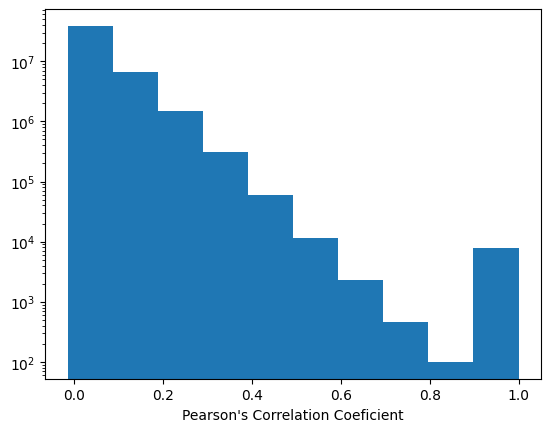

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")


In [13]:
from groups_generators import GroupsGenerator
user_id_set = sorted(user_id_set)
group_list = list()
for group_type in group_similarity_to_create:
    print(group_type)
    grpGenerator = GroupsGenerator.getGroupsGenerator(group_type)
    current_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    
    display(pd.DataFrame.from_records(current_list))
    
    group_list = group_list + current_list

RANDOM
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,random,"[1289797, 1393700]",-0.009674
1,2,random,"[1366127, 1004168]",-0.008242
2,2,random,"[1240789, 1277541]",-0.010677
3,2,random,"[1689752, 1155516]",0.079470
4,2,random,"[1402831, 1135188]",-0.010666
5,2,random,"[1019546, 1216671]",0.084150
6,2,random,"[1250221, 1364007]",-0.011004
7,2,random,"[2049904, 1298350]",-0.008542
8,2,random,"[1009530, 1457483]",0.173955
9,2,random,"[1004382, 1275951]",-0.009082


SIMILAR
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar,"[1217008, 1139787]",0.628022
1,2,similar,"[1035531, 1141413]",0.604088
2,2,similar,"[1846560, 1604375]",0.630797
3,2,similar,"[1263844, 1215447]",0.611283
4,2,similar,"[1451130, 1223159]",0.699102
5,2,similar,"[1039599, 1027022]",0.762502
6,2,similar,"[1154953, 1156950]",0.634301
7,2,similar,"[1387930, 1936578]",1.000000
8,2,similar,"[1213854, 1198871]",0.688204
9,2,similar,"[1121498, 1210217]",0.610918


DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,divergent,"[1357590, 1199442]",-0.010672
1,2,divergent,"[2049904, 1102960]",-0.010145
2,2,divergent,"[1042796, 1164202]",-0.009073
3,2,divergent,"[1201456, 1134761]",-0.009359
4,2,divergent,"[1658333, 1241676]",0.071739
5,2,divergent,"[1280919, 1237232]",-0.012675
6,2,divergent,"[1249468, 1067750]",-0.008485
7,2,divergent,"[1488067, 1592096]",-0.010058
8,2,divergent,"[1666961, 1411313]",-0.003499
9,2,divergent,"[1176822, 1357590]",-0.003372


SIMILAR_ONE_DIVERGENT
20
40
60


,group_size,group_similarity,group_members,avg_similarity
0,2,similar_one_divergent,"[1570445, 1188358]",-0.010601
1,2,similar_one_divergent,"[1608399, 1764158]",0.100042
2,2,similar_one_divergent,"[1223820, 1006915]",0.054578
3,2,similar_one_divergent,"[1488418, 1361646]",-0.007921
4,2,similar_one_divergent,"[1124868, 1407607]",-0.011958
5,2,similar_one_divergent,"[1211233, 1114010]",-0.010103
6,2,similar_one_divergent,"[1217008, 1258840]",-0.011016
7,2,similar_one_divergent,"[1866779, 1232945]",0.117459
8,2,similar_one_divergent,"[1076183, 1506123]",-0.012071
9,2,similar_one_divergent,"[1103694, 1189761]",-0.012595


In [14]:
# group_list = group_list_random + group_list_similar + group_list_divergent + group_list_sim_one_div
#group_list = group_list_sim_one_div

group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group
display(group_dict)

{0: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1289797, 1393700],
  'avg_similarity': -0.009673893454841018},
 1: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1366127, 1004168],
  'avg_similarity': -0.008241751284406532},
 2: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1240789, 1277541],
  'avg_similarity': -0.010676955244883476},
 3: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1689752, 1155516],
  'avg_similarity': 0.07947019493999614},
 4: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1402831, 1135188],
  'avg_similarity': -0.010666239142897119},
 5: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1019546, 1216671],
  'avg_similarity': 0.08415046686428257},
 6: {'group_size': 2,
  'group_similarity': 'random',
  'group_members': [1250221, 1364007],
  'avg_similarity': -0.011003824065782724},
 7: {'group_size': 2,
  'group_similarity': '

In [15]:
# simple similarity viewer per group
np.set_printoptions(precision=4, suppress=True)
idx = 200
member_index = [user_id_indexes.tolist().index(member) for member in group_dict[idx]["group_members"]]
s = sim_matrix[member_index]
s[:,member_index]

array([[ 1.   ,  1.   ,  1.   , -0.001],
       [ 1.   ,  1.   ,  1.   , -0.001],
       [ 1.   ,  1.   ,  1.   , -0.001],
       [-0.001, -0.001, -0.001,  1.   ]])

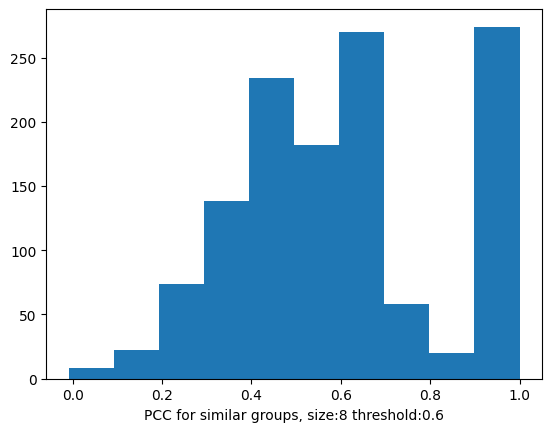

In [16]:
group_similarity = "similar"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.similar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.similar_threshold*10))+".png", dpi=300)

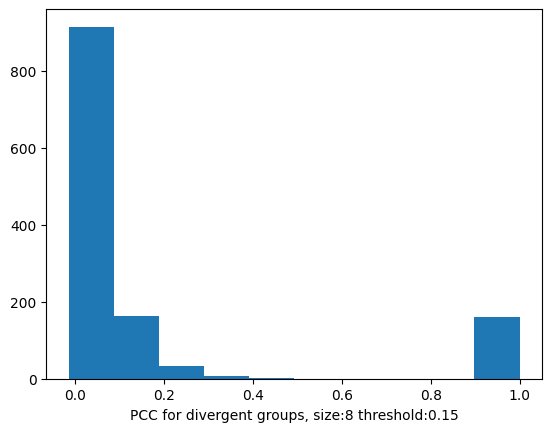

In [17]:
group_similarity = "divergent"
group_size = 8
histogram_list = []
for gid in group_dict.keys():
    g = group_dict[gid]
    if g["group_similarity"] == group_similarity and g["group_size"] == group_size:
        member_index = [user_id_indexes.tolist().index(member) for member in g["group_members"]]
        s = sim_matrix[member_index]
        histogram_list.extend(s[:,member_index].flatten().tolist())

        
plt.hist(histogram_list)
#plt.yscale("log")
plt.xlabel("PCC for "+group_similarity+" groups, size:"+str(group_size)+" threshold:"+str(cfg.dissimilar_threshold))    
plt.savefig("pcc_"+group_similarity+"_"+str(group_size)+"_"+str(int(cfg.dissimilar_threshold*10))+".png", dpi=300)

In [18]:
groups_list = list()
for group in group_dict:
    groups_list.append(
        {
            'group_id': group,
            'group_size': group_dict[group]['group_size'],
            'group_similarity': group_dict[group]['group_similarity'],
            'group_members': group_dict[group]['group_members'],
            'avg_similarity': group_dict[group]['avg_similarity']
        }
    )

groups_df = pd.DataFrame.from_records(groups_list)
display(groups_df.head(10))

,group_id,group_size,group_similarity,group_members,avg_similarity
0,0,2,random,"[1289797, 1393700]",-0.009674
1,1,2,random,"[1366127, 1004168]",-0.008242
2,2,2,random,"[1240789, 1277541]",-0.010677
3,3,2,random,"[1689752, 1155516]",0.079470
4,4,2,random,"[1402831, 1135188]",-0.010666
5,5,2,random,"[1019546, 1216671]",0.084150
6,6,2,random,"[1250221, 1364007]",-0.011004
7,7,2,random,"[2049904, 1298350]",-0.008542
8,8,2,random,"[1009530, 1457483]",0.173955
9,9,2,random,"[1004382, 1275951]",-0.009082


### Comparing groups internal average similarity between the different types and sizes 

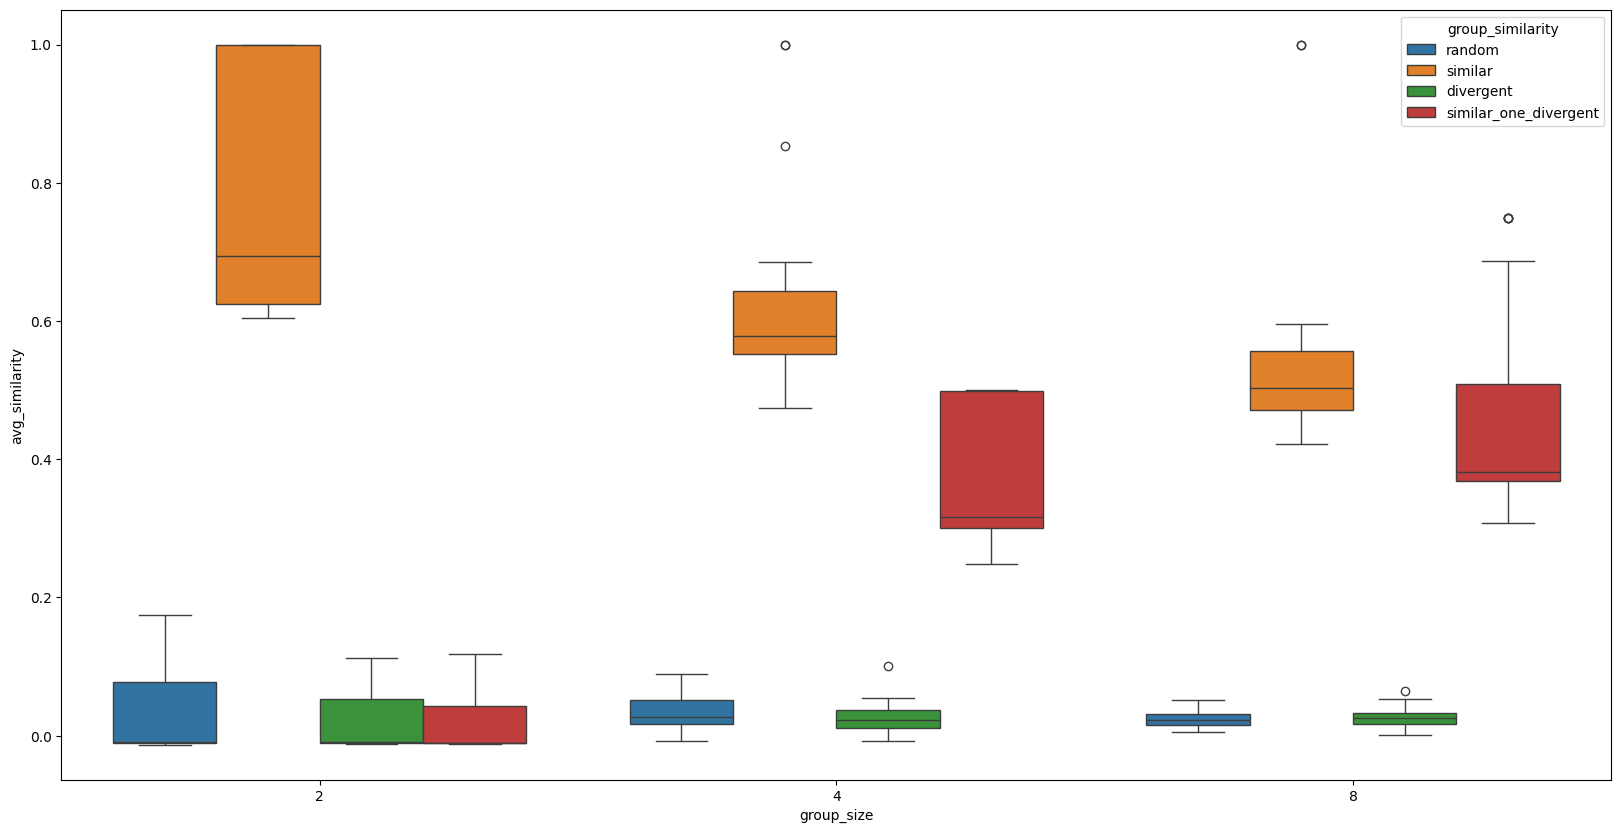

In [19]:
import seaborn as sns


plt.rcParams["figure.figsize"] = (20,10)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt